# To run ONCE during session

In [2]:
## importing all libraries and dependencies
import pandas as pd
import numpy as np
import os
from os import listdir
import glob
from os.path import isfile, join
import shutil
import PIL
from PIL import Image
import random
import math
from heapq import merge
from random import *
import scipy as sp
from scipy import stats
import seaborn as sns
from matplotlib import pyplot as plt

In [3]:
subs = []
SC_all_SSwithin_bias = []
SC_all_TTwithin_bias = []

SC_all_SSacross_bias = []
SC_all_STacross_bias = []
SC_all_TSacross_bias = []
SC_all_TTacross_bias = []

In [4]:
sum_dir = '/Users/ayesh/Desktop/Gradstuff/Temp_mem2022/SCL_final/summary_behav/'
dir_ext = [f for f in listdir(sum_dir)]
pt_dir_lst = []
for i in dir_ext:
    pt_dir = sum_dir + i
    pt_dir_lst.append(pt_dir)

In [4]:
pt_dir_lst

['/Users/ayesh/Desktop/Gradstuff/Temp_mem2022/SCL_final/summary_behav/32.0_ptsummary.csv',
 '/Users/ayesh/Desktop/Gradstuff/Temp_mem2022/SCL_final/summary_behav/34.0_ptsummary.csv',
 '/Users/ayesh/Desktop/Gradstuff/Temp_mem2022/SCL_final/summary_behav/35.0_ptsummary.csv',
 '/Users/ayesh/Desktop/Gradstuff/Temp_mem2022/SCL_final/summary_behav/36.0_ptsummary.csv',
 '/Users/ayesh/Desktop/Gradstuff/Temp_mem2022/SCL_final/summary_behav/37.0_ptsummary.csv',
 '/Users/ayesh/Desktop/Gradstuff/Temp_mem2022/SCL_final/summary_behav/38.0_ptsummary.csv',
 '/Users/ayesh/Desktop/Gradstuff/Temp_mem2022/SCL_final/summary_behav/39.0_ptsummary.csv',
 '/Users/ayesh/Desktop/Gradstuff/Temp_mem2022/SCL_final/summary_behav/41.0_ptsummary.csv',
 '/Users/ayesh/Desktop/Gradstuff/Temp_mem2022/SCL_final/summary_behav/42.0_ptsummary.csv',
 '/Users/ayesh/Desktop/Gradstuff/Temp_mem2022/SCL_final/summary_behav/43.0_ptsummary.csv',
 '/Users/ayesh/Desktop/Gradstuff/Temp_mem2022/SCL_final/summary_behav/45.0_ptsummary.csv',

In [5]:
tempdist_files = []
srcmem_files = []

for a in pt_dir_lst:
    if a[-4:] == '.csv' and '0_ptsummary' in a:
        tempdist_files.append(a)
    if a[-4:] == '.csv' and '0_ptSM_summary' in a:
        srcmem_files.append(a)

## Edit # for each participant

In [706]:
pt_num = '75.0'

In [707]:
for t in tempdist_files:
    pt_num_tem = t[-18:-14]
    if pt_num_tem == pt_num:
        dt = pd.read_csv(t)
        condition = dt.condition
        objects1 =  list(dt.objects_pics)
        objects2 = list(dt.objects_pics2)
        key_resp = dt.key_resp_keys
        key_resp_rt = dt.key_resp_rt
        run_td = dt.run_num
        
for s in srcmem_files:
    pt_num_src = s[-21:-17]
    if pt_num_src == pt_num:
        sr = pd.read_csv(s)
        src_temp= []
        for index, row in sr.iterrows():
            obj = sr.test_object[index]
            if (obj in objects1) or (obj in objects2):
                src_temp.append(row)
                
src_temp_df = pd.DataFrame(src_temp)

In [708]:
src_corr = src_temp_df.loc[src_temp_df['key_resp_corr'] == 1]
src_corr

,Unnamed: 0,test_object,correct_context,tested_valence,same_val,opp_val,same_foil,opp_foil,test1_thisRepN,test1_thisTrialN,...,frameRate,Unnamed: 45,run_num,Unnamed: 41,text_4_stopped,Unnamed: 42,run_sm,allrun_src,safe_runsSM,threat_runsSM
0,3,new_obs/1_390.jpg,Scenes_selected/scene_043.jpg,THREAT,threat,safe,Scenes_selected/scene_014.jpg,Scenes_selected/scene_068.jpg,0.0,0.0,...,59.795702,NaN,1,NaN,NaN,NaN,0.574074,"[0.5740740740740741, 0.6851851851851852, 0.611...","[0.4444444444444444, 0.7407407407407407, 0.685...","[0.7037037037037037, 0.6296296296296297, 0.537..."
2,5,new_obs/1_424.jpg,Scenes_selected/scene_006.jpg,SAFE,safe,threat,Scenes_selected/scene_009.jpg,Scenes_selected/scene_040.jpg,0.0,2.0,...,59.795702,NaN,1,NaN,NaN,NaN,0.574074,"[0.5740740740740741, 0.6851851851851852, 0.611...","[0.4444444444444444, 0.7407407407407407, 0.685...","[0.7037037037037037, 0.6296296296296297, 0.537..."
7,10,new_obs/1_508.jpg,Scenes_selected/scene_081.jpeg,THREAT,threat,safe,Scenes_selected/scene_024.jpg,Scenes_selected/scene_006.jpg,0.0,7.0,...,59.795702,NaN,1,NaN,NaN,NaN,0.574074,"[0.5740740740740741, 0.6851851851851852, 0.611...","[0.4444444444444444, 0.7407407407407407, 0.685...","[0.7037037037037037, 0.6296296296296297, 0.537..."
8,11,new_obs/1_597.jpg,Scenes_selected/scene_054.jpg,THREAT,threat,safe,Scenes_selected/scene_043.jpg,Scenes_selected/scene_068.jpg,0.0,8.0,...,59.795702,NaN,1,NaN,NaN,NaN,0.574074,"[0.5740740740740741, 0.6851851851851852, 0.611...","[0.4444444444444444, 0.7407407407407407, 0.685...","[0.7037037037037037, 0.6296296296296297, 0.537..."
12,15,new_obs/1_14.jpg,Scenes_selected/scene_064.jpg,SAFE,safe,threat,Scenes_selected/scene_003.jpg,Scenes_selected/scene_014.jpg,0.0,12.0,...,59.795702,NaN,1,NaN,NaN,NaN,0.574074,"[0.5740740740740741, 0.6851851851851852, 0.611...","[0.4444444444444444, 0.7407407407407407, 0.685...","[0.7037037037037037, 0.6296296296296297, 0.537..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
527,97,new_obs/1_187.jpg,Scenes_selected/scene_059.jpg,SAFE,safe,threat,Scenes_selected/scene_021.jpg,Scenes_selected/scene_088.jpg,0.0,95.0,...,59.772720,NaN,5,NaN,NaN,NaN,0.537037,"[0.5740740740740741, 0.6851851851851852, 0.611...","[0.4444444444444444, 0.7407407407407407, 0.685...","[0.7037037037037037, 0.6296296296296297, 0.537..."
530,100,new_obs/1_301.jpg,Scenes_selected/scene_051.jpg,THREAT,threat,safe,Scenes_selected/scene_088.jpg,Scenes_selected/scene_079.jpg,0.0,98.0,...,59.772720,NaN,5,NaN,NaN,NaN,0.537037,"[0.5740740740740741, 0.6851851851851852, 0.611...","[0.4444444444444444, 0.7407407407407407, 0.685...","[0.7037037037037037, 0.6296296296296297, 0.537..."
535,105,new_obs/object_455.jpg,Scenes_selected/scene_097.jpeg,THREAT,threat,safe,Scenes_selected/scene_062.jpg,Scenes_selected/scene_066.jpg,0.0,103.0,...,59.772720,NaN,5,NaN,NaN,NaN,0.537037,"[0.5740740740740741, 0.6851851851851852, 0.611...","[0.4444444444444444, 0.7407407407407407, 0.685...","[0.7037037037037037, 0.6296296296296297, 0.537..."
537,107,new_obs/1_524.jpg,Scenes_selected/scene_025.jpg,THREAT,threat,safe,Scenes_selected/scene_013.jpeg,Scenes_selected/scene_080.jpeg,0.0,105.0,...,59.772720,NaN,5,NaN,NaN,NaN,0.537037,"[0.5740740740740741, 0.6851851851851852, 0.611...","[0.4444444444444444, 0.7407407407407407, 0.685...","[0.7037037037037037, 0.6296296296296297, 0.537..."


In [709]:
mrgd = dt.merge(src_temp_df,how='left', left_on='objects_pics', right_on='test_object')
mrgd_dts = 'C:/Users/ayesh/Desktop/Gradstuff/Temp_mem2022/SCL_final/summary_behav/src_controlled_bias/'
os.makedirs(mrgd_dts, exist_ok=True)  
mrgd.to_csv(mrgd_dts+"%s_MRGD_srctemp.csv"%pt_num, index = True, header = True )

In [710]:
shrt_df = pd.DataFrame({ 
                        'contxt1': mrgd.context_type,
                        'contxt2': mrgd.context_type2,
                        'context_shock':mrgd.context_shock,
                        'context_shock2':mrgd.context_shock2,
                        'cond1': mrgd.condition,
                        'cond2': mrgd.condition2,
                        'resp_temp': mrgd.key_resp_keys_x,
                        'rt_temp': mrgd.key_resp_rt_x,
                        'resp_acc': mrgd.key_resp_corr,
                        'resp_src': mrgd.key_resp_keys_y,
                        'rt_src': mrgd.key_resp_rt_y})

In [711]:
within_TT = []
within_SS = []

across_TT = []
across_TS = []
across_ST = []
across_SS = []

rt_within_TT = []
rt_within_SS = []

rt_across_TT = []
rt_across_TS = []
rt_across_ST = []
rt_across_SS = []

for index, row in shrt_df.iterrows():
    resp_dt = shrt_df.resp_temp
    resp_rt = shrt_df.rt_temp
    if shrt_df.cond1[index] == 'within_threat1' and shrt_df.cond2[index] == 'within_threat2' and shrt_df.resp_acc[index] == 1:
        within_TT.append(resp_dt[index])
        rt_within_TT.append(resp_rt[index])
        
    if shrt_df.cond1[index] == 'within_safe1' and shrt_df.cond2[index] == 'within_safe2' and shrt_df.resp_acc[index] == 1:
        within_SS.append(resp_dt[index])
        rt_within_SS.append(resp_rt[index])
        
for index, row in shrt_df.iterrows():
    resp_dt = shrt_df.resp_temp
    resp_rt = shrt_df.rt_temp
    if shrt_df.cond1[index] == 'across_threat1' and shrt_df.cond2[index] == 'across_threat2' and shrt_df.context_shock[index] != 'prior' and shrt_df.context_shock2[index] != 'post' and shrt_df.resp_acc[index] == 1:
        across_TT.append(resp_dt[index])
        rt_across_TT.append(resp_rt[index])
        
    if shrt_df.cond1[index] == 'across_threat1' and shrt_df.cond2[index] == 'across_safe2' and shrt_df.context_shock[index] != 'prior' and shrt_df.context_shock2[index] != 'post' and shrt_df.resp_acc[index] == 1:
        across_TS.append(resp_dt[index])
        rt_across_TS.append(resp_rt[index])
        
    if shrt_df.cond1[index] == 'across_safe1' and shrt_df.cond2[index] == 'across_threat2' and shrt_df.context_shock[index] != 'prior' and shrt_df.context_shock2[index] != 'post' and shrt_df.resp_acc[index] == 1:
        across_ST.append(resp_dt[index])
        rt_across_ST.append(resp_rt[index])
    
    if shrt_df.cond1[index] == 'across_safe1' and shrt_df.cond2[index] == 'across_safe2' and shrt_df.context_shock[index] != 'prior' and shrt_df.context_shock2[index] != 'post' and shrt_df.resp_acc[index] == 1:
        across_SS.append(resp_dt[index])
        rt_across_SS.append(resp_rt[index])

In [712]:
SSwithin_close = []
SSwithin_far = []

TTwithin_close = []
TTwithin_far = []

for a in within_SS:
    if a == 1 or a == 2:
        SSwithin_close.append(a)
    if a == 3 or a == 4:
        SSwithin_far.append(a)
        
for a in within_TT:
    if a == 1 or a == 2:
        TTwithin_close.append(a)
    if a == 3 or a == 4:
        TTwithin_far.append(a)

In [713]:
SSacross_close = []
SSacross_far = []

STacross_close = []
STacross_far = []

TSacross_close = []
TSacross_far = []

TTacross_close = []
TTacross_far = []

for c in across_SS:
    if c == 1 or c == 2:
        SSacross_close.append(c)
    if c == 3 or c == 4:
        SSacross_far.append(c)
        
for c in across_TT:
    if c == 1 or c == 2:
        TTacross_close.append(c)
    if c == 3 or c == 4:
        TTacross_far.append(c)
        
for c in across_ST:
    if c == 1 or c == 2:
        STacross_close.append(c)
    if c == 3 or c == 4:
        STacross_far.append(c)
        
for c in across_TS:
    if c == 1 or c == 2:
        TSacross_close.append(c)
    if c == 3 or c == 4:
        TSacross_far.append(c)


In [714]:
SSwithin_bias = (len(SSwithin_close)-len(SSwithin_far))/(len(SSwithin_close)+len(SSwithin_far))
SC_all_SSwithin_bias.append(SSwithin_bias)
TTwithin_bias = (len(TTwithin_close)-len(TTwithin_far))/(len(TTwithin_close)+len(TTwithin_far))
SC_all_TTwithin_bias.append(TTwithin_bias)

SSacross_bias = (len(SSacross_close)-len(SSacross_far))/(len(SSacross_close)+len(SSacross_far))
SC_all_SSacross_bias.append(SSacross_bias)
STacross_bias = (len(STacross_close)-len(STacross_far))/(len(STacross_close)+len(STacross_far))
SC_all_STacross_bias.append(STacross_bias)
TSacross_bias = (len(TSacross_close)-len(TSacross_far))/(len(TSacross_close)+len(TSacross_far))
SC_all_TSacross_bias.append(TSacross_bias)
TTacross_bias = (len(TTacross_close)-len(TTacross_far))/(len(TTacross_close)+len(TTacross_far))
SC_all_TTacross_bias.append(TTacross_bias)

subs.append(pt_num)

Text(0.5, 1.0, '75.0_Within context temporal bias')

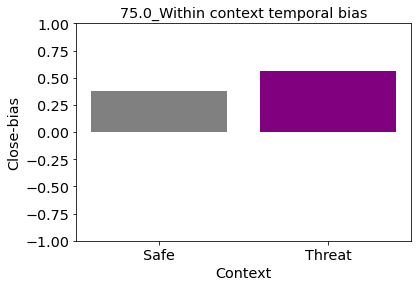

In [715]:
x = ['Safe', 'Threat']
y = [SSwithin_bias, TTwithin_bias]
plt.bar(x, y, width=0.8, bottom=None, color = ['grey', 'purple'], align='center', data=None)
plt.ylim(-1, 1)
plt.xlabel("Context", fontsize = "x-large")
plt.xticks(fontsize = "x-large")
plt.ylabel("Close-bias", fontsize = "x-large")
plt.yticks(fontsize = "x-large")
plt.title("%s_Within context temporal bias"%pt_num, fontsize = "x-large")

Text(0.5, 1.0, '75.0_Across context temporal bias')

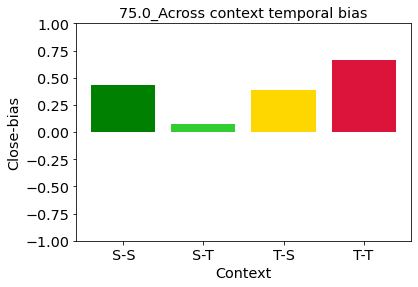

In [716]:
x = ['S-S', 'S-T', 'T-S', 'T-T']
y = [SSacross_bias, STacross_bias, TSacross_bias, TTacross_bias]
plt.bar(x, y, width=0.8, bottom=None, color = ['green', 'limegreen', 'gold','crimson'], align='center', data=None)
plt.ylim(-1, 1)
plt.xlabel("Context", fontsize = "x-large")
plt.xticks(fontsize = "x-large")
plt.ylabel("Close-bias", fontsize = "x-large")
plt.yticks(fontsize = "x-large")
plt.title("%s_Across context temporal bias"%pt_num, fontsize = "x-large")

Text(0.5, 1.0, 'All pts_Across context temporal bias')

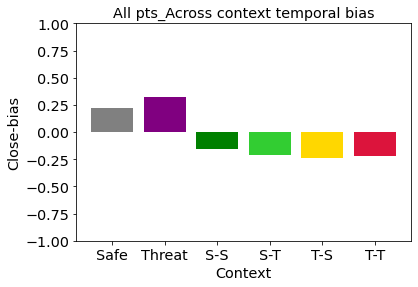

In [717]:
x = ['Safe', 'Threat','S-S', 'S-T', 'T-S', 'T-T']
y = [np.mean(SC_all_SSwithin_bias), np.mean(SC_all_TTwithin_bias), np.mean(SC_all_SSacross_bias), np.mean(SC_all_STacross_bias), np.mean(SC_all_TSacross_bias), np.mean(SC_all_TTacross_bias)]
plt.bar(x, y, width=0.8, bottom=None, color = ['grey', 'purple','green', 'limegreen', 'gold','crimson'], align='center', data=None)
plt.ylim(-1, 1)
plt.xlabel("Context", fontsize = "x-large")
plt.xticks(fontsize = "x-large")
plt.ylabel("Close-bias", fontsize = "x-large")
plt.yticks(fontsize = "x-large")
plt.title("All pts_Across context temporal bias", fontsize = "x-large")

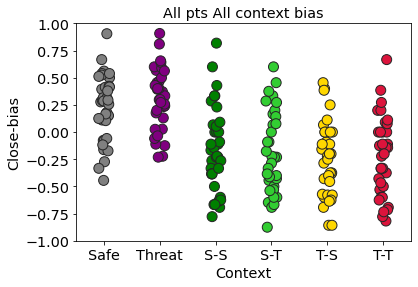

In [718]:
labels = ['Safe', 'Threat', 'S-S','S-T', 'T-S', 'T-T']
data = [SC_all_SSwithin_bias, SC_all_TTwithin_bias, SC_all_SSacross_bias, SC_all_STacross_bias, SC_all_TSacross_bias, SC_all_TTacross_bias]
colors = ['grey', 'purple','green', 'limegreen', 'gold','crimson']
sns.stripplot(data = data, s=10, linewidth=1, palette=colors)

plt.ylim(-1, 1)
plt.xlabel("Context", fontsize = "x-large")
plt.xticks(np.arange(6), labels, fontsize = "x-large")
plt.ylabel("Close-bias", fontsize = "x-large")
plt.yticks(fontsize = "x-large")
plt.title("All pts All context bias", fontsize = "x-large")
plt.show()

In [719]:
summarydf = pd.DataFrame({"Participant": subs,
                          "Safe_within_bias":SC_all_SSwithin_bias,
                          "Threat_within_bias":SC_all_TTwithin_bias,
                         "SS_across_bias":SC_all_SSacross_bias,
                         "ST_across_bias":SC_all_STacross_bias,
                         "TS_across_bias":SC_all_TSacross_bias,
                         "TT_across_bias":SC_all_TTacross_bias})
summarydf.to_csv(mrgd_dts+"allSC_bias.csv", index = True, header = True )

In [720]:
summarydf

,Participant,Safe_within_bias,Threat_within_bias,SS_across_bias,ST_across_bias,TS_across_bias,TT_across_bias
0,32.0,0.560976,0.578947,-0.263158,-0.230769,-0.375000,-0.375000
1,34.0,0.393939,0.235294,0.285714,0.166667,0.000000,0.000000
2,35.0,0.151515,0.393939,-0.692308,-0.647059,-0.200000,-0.818182
3,36.0,-0.076923,0.371429,-0.111111,-0.692308,-0.428571,0.384615
4,37.0,0.411765,0.454545,-0.500000,-0.230769,-0.857143,-0.111111
5,38.0,0.179487,0.567568,-0.333333,-0.222222,-0.157895,-0.529412
6,39.0,0.538462,0.241379,-0.166667,0.600000,0.400000,-0.125000
7,41.0,-0.076923,-0.125000,0.000000,0.333333,0.000000,-0.333333
8,42.0,0.904762,0.809524,0.000000,-0.444444,-0.222222,-0.333333
9,43.0,0.151515,0.130435,-0.230769,-0.090909,-0.600000,-0.142857


# predicted results

Text(0.5, 1.0, 'Predicted Temporal Bias')

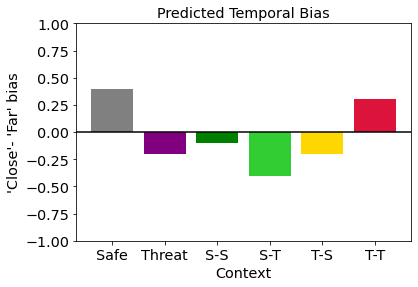

In [721]:
x = ['Safe', 'Threat','S-S', 'S-T', 'T-S', 'T-T']
y = [0.4, -0.2, -0.1, -0.4, -0.2, 0.3]
plt.bar(x, y, width=0.8, bottom=None, color = ['grey', 'purple','green', 'limegreen', 'gold','crimson'], align='center', data=None)
plt.ylim(-1, 1)
plt.xlabel("Context", fontsize = "x-large")
plt.xticks(fontsize = "x-large")
plt.ylabel("'Close'- 'Far' bias", fontsize = "x-large")
plt.yticks(fontsize = "x-large")
plt.axhline(y = 0.0, color = 'k', linestyle = '-')
plt.title("Predicted Temporal Bias", fontsize = "x-large")

# group results

In [722]:
res_csv = pd.read_csv('/Users/ayesh/Desktop/Gradstuff/Temp_mem2022/SCL_final/summary_behav/src_controlled_bias/allSC_bias.csv')

In [723]:
res_csv

,Unnamed: 0,Participant,Safe_within_bias,Threat_within_bias,SS_across_bias,ST_across_bias,TS_across_bias,TT_across_bias
0,0,32.0,0.560976,0.578947,-0.263158,-0.230769,-0.375000,-0.375000
1,1,34.0,0.393939,0.235294,0.285714,0.166667,0.000000,0.000000
2,2,35.0,0.151515,0.393939,-0.692308,-0.647059,-0.200000,-0.818182
3,3,36.0,-0.076923,0.371429,-0.111111,-0.692308,-0.428571,0.384615
4,4,37.0,0.411765,0.454545,-0.500000,-0.230769,-0.857143,-0.111111
5,5,38.0,0.179487,0.567568,-0.333333,-0.222222,-0.157895,-0.529412
6,6,39.0,0.538462,0.241379,-0.166667,0.600000,0.400000,-0.125000
7,7,41.0,-0.076923,-0.125000,0.000000,0.333333,0.000000,-0.333333
8,8,42.0,0.904762,0.809524,0.000000,-0.444444,-0.222222,-0.333333
9,9,43.0,0.151515,0.130435,-0.230769,-0.090909,-0.600000,-0.142857


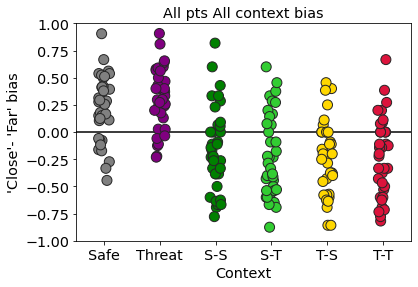

In [724]:
labels = ['Safe', 'Threat', 'S-S','S-T', 'T-S', 'T-T']
data = [res_csv.Safe_within_bias, res_csv.Threat_within_bias, res_csv.SS_across_bias, res_csv.ST_across_bias, res_csv.TS_across_bias, res_csv.TT_across_bias]
colors = ['grey', 'purple','green', 'limegreen', 'gold','crimson']
sns.stripplot(data = data, s=10, linewidth=1, palette=colors)

plt.ylim(-1, 1)
plt.xlabel("Context", fontsize = "x-large")
plt.xticks(np.arange(6), labels, fontsize = "x-large")
plt.ylabel("'Close'- 'Far' bias", fontsize = "x-large")
plt.yticks(fontsize = "x-large")
plt.axhline(y = 0.0, color = 'k', linestyle = '-')
plt.title("All pts All context bias", fontsize = "x-large")
plt.show()

Text(0.5, 1.0, 'All participants (N = 36) temporal bias')

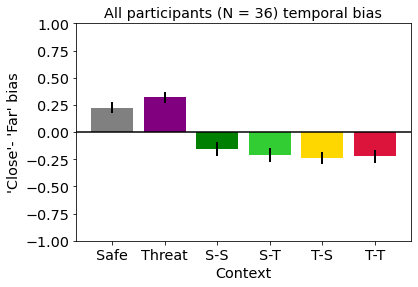

In [725]:
x = ['Safe', 'Threat','S-S', 'S-T', 'T-S', 'T-T']
y = [np.mean(res_csv.Safe_within_bias), np.mean(res_csv.Threat_within_bias), np.mean(res_csv.SS_across_bias), np.mean(res_csv.ST_across_bias), np.mean(res_csv.TS_across_bias), np.mean(res_csv.TT_across_bias)]
totalpts = len(res_csv)
sem = [stats.sem(res_csv.Safe_within_bias), stats.sem(res_csv.Threat_within_bias), stats.sem(res_csv.SS_across_bias), stats.sem(res_csv.ST_across_bias), stats.sem(res_csv.TS_across_bias), stats.sem(res_csv.TT_across_bias)]
plt.bar(x, y, width=0.8, bottom=None, color = ['grey', 'purple','green', 'limegreen', 'gold','crimson'], align='center', data=None, yerr = sem, error_kw=dict(elinewidth=2,ecolor='black'))
plt.ylim(-1, 1)
plt.xlabel("Context", fontsize = "x-large")
plt.xticks(fontsize = "x-large")
plt.ylabel("'Close'- 'Far' bias", fontsize = "x-large")
plt.yticks(fontsize = "x-large")
plt.axhline(y = 0.0, color = 'k', linestyle = '-')
plt.title("All participants (N = %s) temporal bias"%totalpts, fontsize = "x-large")